In [1]:
from math import acos, degrees

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch

from src.modules.max_mahalanobis import MaxMahalanobis

In [2]:
plt.rcParams["figure.dpi"] = 227

# Angle between centers (CIFAR-10)

In [3]:
n_features_vec = np.arange(18, 300 + 1)
n_classes_vec = np.arange(2, 18 + 1)

angles = np.empty((n_classes_vec.size, n_features_vec.size))
for x, n_features in enumerate(n_features_vec):
    for y, n_classes in enumerate(n_classes_vec):
        layer = MaxMahalanobis(10, n_features, n_classes)
        dot_product = torch.dot(layer.centers[0, :], layer.centers[1, :])
        radians_val = acos(dot_product / 10 ** 2)
        angles[y, x] = degrees(radians_val)

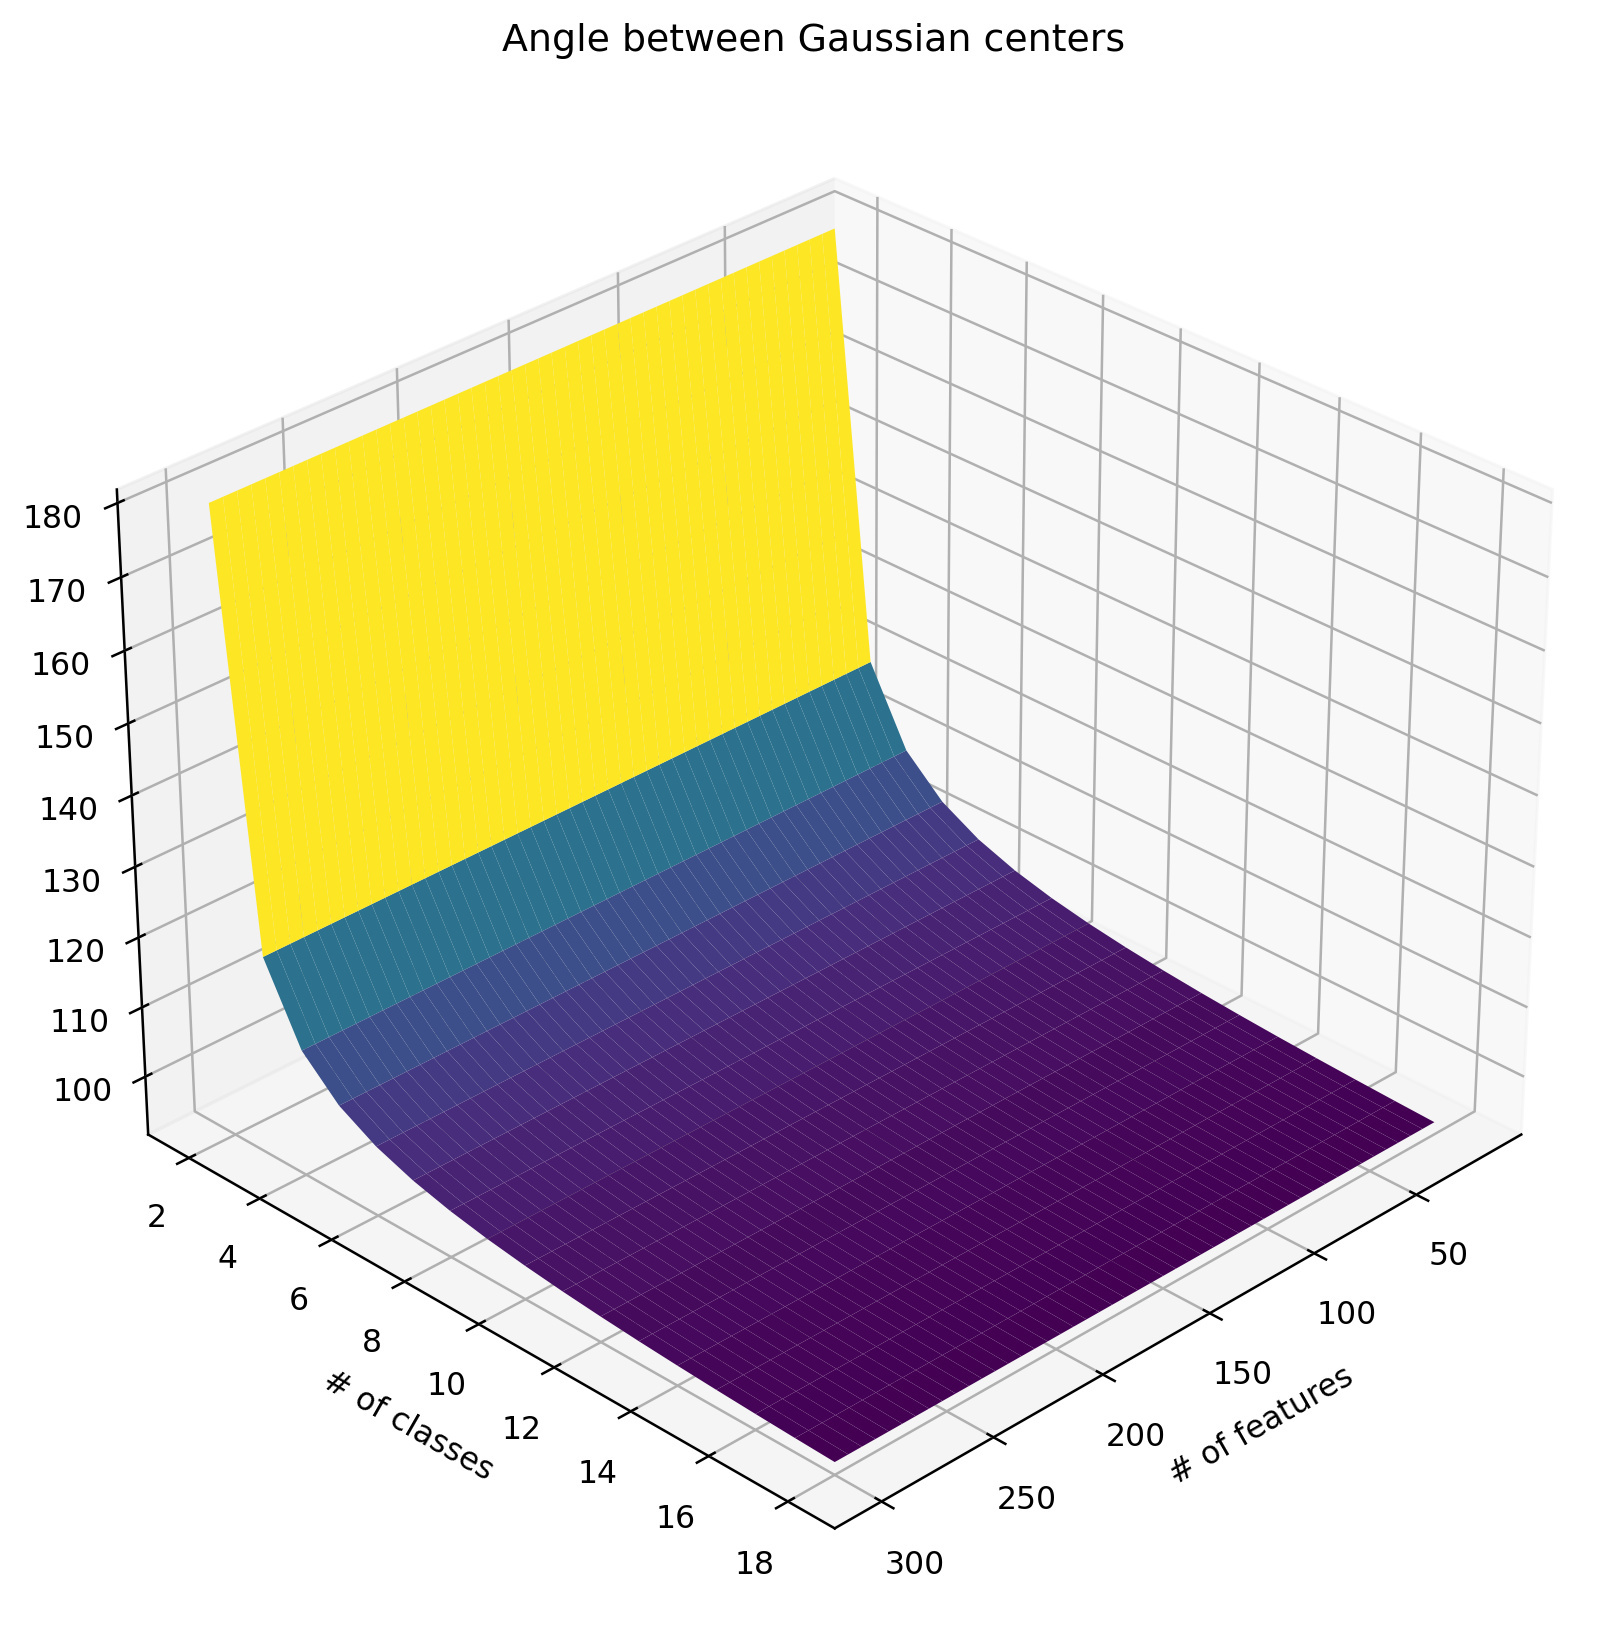

In [4]:
x, y = np.meshgrid(n_features_vec, n_classes_vec)

fig = plt.figure(figsize=(12, 9))
ax = fig.gca(projection="3d")
ax.plot_surface(x, y, angles, cmap="viridis")

plt.xlabel("# of features")
plt.ylabel("# of classes")
plt.title("Angle between Gaussian centers")

ax.view_init(30, 45)
plt.show()

# Distance between centers (CIFAR-10)

In [5]:
n_features_vec = np.arange(18, 300 + 1)
n_classes_vec = np.arange(2, 18 + 1)

distances = np.empty((n_classes_vec.size, n_features_vec.size))
for x, n_features in enumerate(n_features_vec):
    for y, n_classes in enumerate(n_classes_vec):
        layer = MaxMahalanobis(10, n_features, n_classes)
        distance = torch.norm(layer.centers[0, :] - layer.centers[1, :])
        distances[y, x] = distance

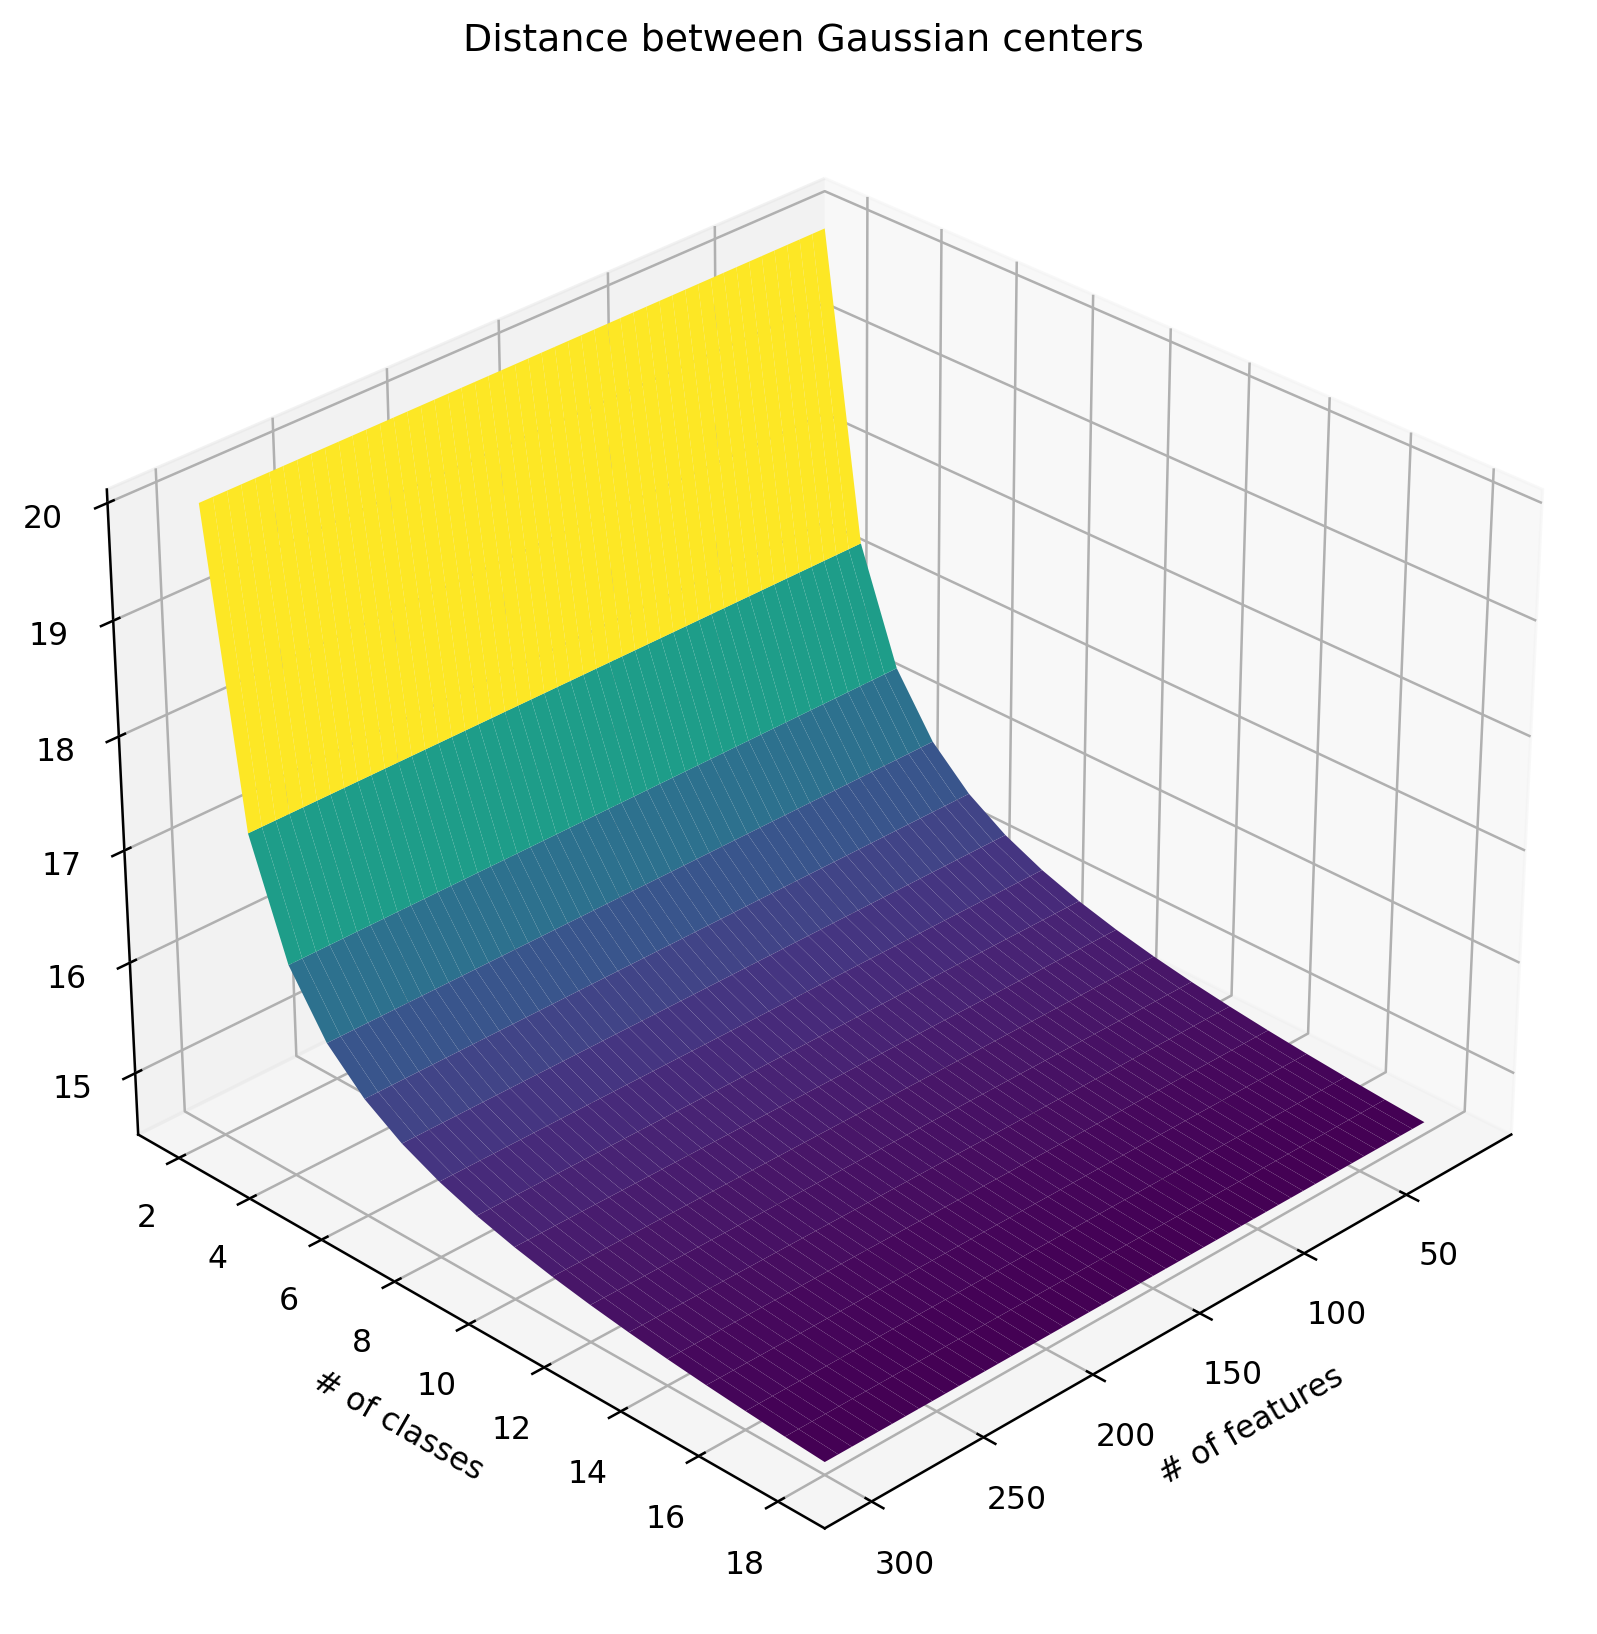

In [6]:
x, y = np.meshgrid(n_features_vec, n_classes_vec)

fig = plt.figure(figsize=(12, 9))
ax = fig.gca(projection="3d")
ax.plot_surface(x, y, distances, cmap="viridis")

plt.xlabel("# of features")
plt.ylabel("# of classes")
plt.title("Distance between Gaussian centers")

ax.view_init(30, 45)
plt.show()

# Comparing CIFAR-10 and ImageNet

In [7]:
layer = MaxMahalanobis(10, 32, 10)
distance = torch.norm(layer.centers[0, :] - layer.centers[1, :])
print(distance)

tensor(14.9071)


In [8]:
layer = MaxMahalanobis(10, 2048, 1000)
distance = torch.norm(layer.centers[0, :] - layer.centers[1, :])
print(distance)

tensor(14.1492)
